Fonte: https://archive.ics.uci.edu/ml/datasets/South+German+Credit

Data Set Information:

The widely used Statlog German credit data ([Web Link]), as of November 2019, suffers from severe errors in the coding information and does not come with any background information. The 'South German Credit' data provide a correction and some background information, based on the Open Data LMU (2010) representation of the same data and several other German language resources.

Goal: Classify good payers and bad payers.

In [1]:
# importing packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#importing dataset
df = pd.read_csv(r'C:\Users\fmanc\Desktop\Project\Perspective_Analytics\Portfolio\SouthGermanCredit\SouthGermanCredit.csv')

# checking dataset dimention
print(df.shape)

(1000, 21)


In [2]:
# command to show all columns
pd.set_option('display.max_columns', None)

# checking dataset (top rows)
df.head(2)

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1


In [3]:
# renaming columns (from german to english)
df.columns = ['Status', 'Duration', 'credit_history', 'purpose', 'amount', 'savings', 'employment_duration',
        'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'age',
        'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker',
        'credit_risk']

# checking changes
df.head(2)

,Status,Duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1


In [4]:
# checking dataset information. We see there is no null values!!!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Status                   1000 non-null   int64
 1   Duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  numbe

In [5]:
# another way to confirm null values
df.isnull().sum()

Status                     0
Duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [6]:
# remove personal_status_sex. This variable is not good to use, according to the data source.
del df["personal_status_sex"]

#checking descriptive statistics
df.describe()

,Status,Duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,1.145000,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.845000,1.404000,1.963000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.477706,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,1.000000,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,1.000000,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,3.000000,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


In [7]:
# checking for quantity of different data per column. As we can see, the columns "age" has 53 different ages. 
df.nunique()

Status                       4
Duration                    33
credit_history               5
purpose                     10
amount                     923
savings                      5
employment_duration          5
installment_rate             4
other_debtors                3
present_residence            4
property                     4
age                         53
other_installment_plans      3
housing                      3
number_credits               4
job                          4
people_liable                2
telephone                    2
foreign_worker               2
credit_risk                  2
dtype: int64

In [8]:
# I tried creating age classes, however, it didn't have such a positive effect.
print(sorted(df["age"].unique()))

[19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 74, 75]


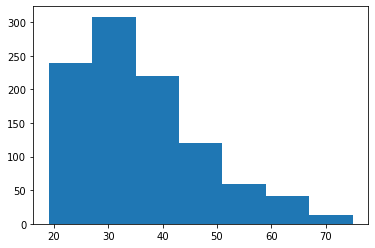

In [9]:
# as we can see, aparently the most of people asking for loan are up to 40 years old. Over 40 is minority. 
x = df["age"]

plt.hist(x, bins=7)
plt.show()

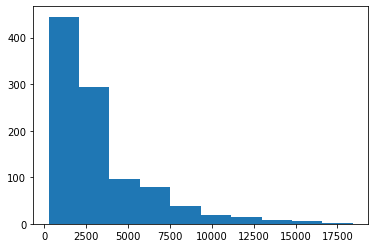

In [10]:
y = df["amount"]

plt.hist(y)
plt.show()

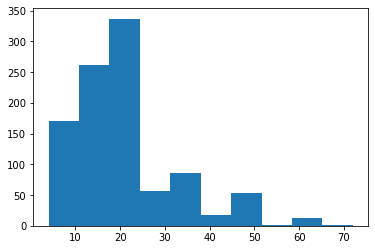

In [11]:
y = df["Duration"]

plt.hist(y)
plt.show()

<AxesSubplot:>

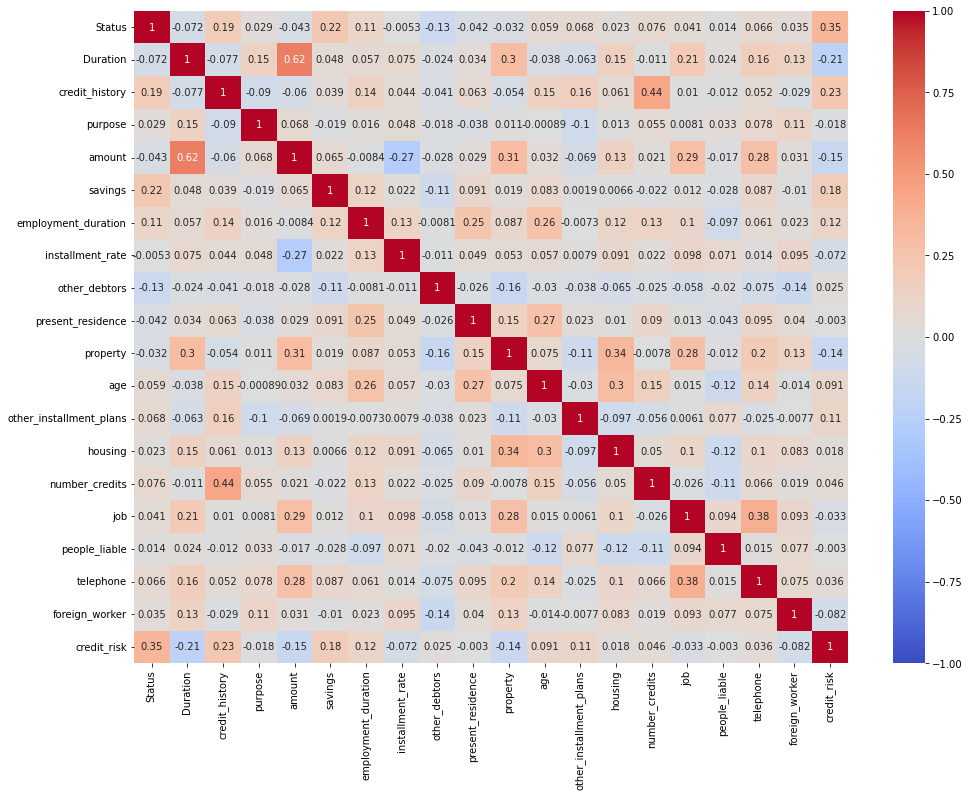

In [12]:
# importing package and checking the correlation between variables
import seaborn as sns

fig, ax = plt.subplots(figsize=(16,12))
color = sns.color_palette("coolwarm", as_cmap=True)
sns.heatmap(df.corr(), vmin=-1, ax=ax, annot=True, cmap=color)

Bad (0):  300
Good (1):  700
Proportion:  2.33 : 1


<AxesSubplot:title={'center':'Count of Target Variable'}, ylabel='Qty'>

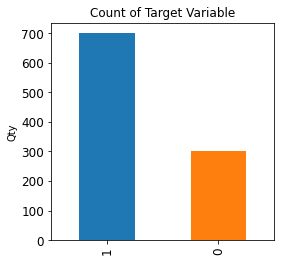

In [13]:
#checking the target balance
fig, ax = plt.subplots(figsize=(4,4))

count_target = df["credit_risk"].value_counts()
print("Bad (0): ", count_target[0])
print("Good (1): ", count_target[1])
print("Proportion: ", round(count_target[1]/count_target[0], 2), ': 1')
count_target.plot(kind='bar', title='Count of Target Variable', color=['#1F77B4','#FF7F0E'], ylabel = 'Qty', fontsize=12)

In [14]:
#Defining categoricals variables
categorical = ['Status', 'credit_history', 'purpose', 'savings', 'other_debtors', 'other_installment_plans', 'housing']

for i in categorical:
    df[i] = df[i].astype('category')

## >>>>> Feature Selection <<<<<

### ExtraTreeClassifier  - Subset df1

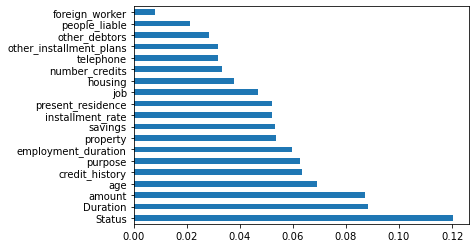

In [15]:
from sklearn.ensemble import ExtraTreesClassifier

# GINI. Even trying use Entropy method we got pretty much the same subset with little difference in the order of variables.

X = df.drop(["credit_risk"], axis=1)
y = df["credit_risk"]

model = ExtraTreesClassifier(random_state=10)
model.fit(X,y)

#plot graph of feature importances for better visualization
#use inbuilt class feature_importances of tree based classifiers
feat_importances = pd.Series(model.feature_importances_, index=X.columns) 
feat_importances.nlargest(df.shape[1]).plot(kind='barh')
plt.show()

In [16]:
# I chose the variables with a score greater than 51% and then i created a subset with them.
df1 = df[['Status', 'Duration', 'amount', 'age', 'purpose', 'credit_history', 'employment_duration', 'property', 
          'savings', 'installment_rate', 'credit_risk']]

## >>>>> Models <<<<<

In [37]:
# Create an instance of RandomOverSampler, fit the training data
from imblearn.over_sampling import RandomOverSampler

try:
    del df["Age_Class"]
except:
    pass

X1 = df1.drop(["credit_risk"], axis=1)
y1 = df1["credit_risk"]

# Applying Standardscalar to standardize the features
scaler = StandardScaler()
X= pd.DataFrame(scaler.fit_transform(X1))

# Splitting dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, stratify=y1, random_state=10)

ros= RandomOverSampler(sampling_strategy='auto')
X_train, y_train = ros.fit_resample(X_train, y_train)

In [38]:
y_train.value_counts()

1    560
0    560
Name: credit_risk, dtype: int64

###  Model 1 - SVM

In [39]:
from sklearn import svm
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

# checking without StandardScaler!
svm = svm.SVC(kernel = 'linear', random_state=80)

svm.fit(X_train, y_train)

pred_svm = svm.predict(X_test)

# one way to view the results
SVM_dict = {'Precision':precision_score(pred_svm, y_test),
               'Recall':recall_score(pred_svm, y_test),
               'F1 Score':f1_score(pred_svm, y_test),
               'Acurácia':accuracy_score(pred_svm, y_test),
               'AUC':roc_auc_score(y_test, pred_svm)}

SVM_dict

{'Precision': 0.6571428571428571,
 'Recall': 0.8598130841121495,
 'F1 Score': 0.7449392712550608,
 'Acurácia': 0.685,
 'AUC': 0.7035714285714286}

In [40]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

from sklearn import svm

svm2 = svm.SVC(kernel = 'linear', random_state=90)
svm2.fit(X_train_scaled, y_train)
pred_svm2 = svm2.predict(X_test_scaled)

SVM_dict2 = {'Precision':precision_score(pred_svm2, y_test),
               'Recall':recall_score(pred_svm2, y_test),
               'F1 Score':f1_score(pred_svm2, y_test),
               'Acurácia':accuracy_score(pred_svm2, y_test),
               'AUC':roc_auc_score(y_test, pred_svm2)}

SVM_dict2

{'Precision': 0.7142857142857143,
 'Recall': 0.8771929824561403,
 'F1 Score': 0.7874015748031495,
 'Acurácia': 0.73,
 'AUC': 0.7404761904761905}

### Model 2 - Naive Bayes

              precision    recall  f1-score   support

           0       0.57      0.72      0.63        60
           1       0.86      0.76      0.81       140

    accuracy                           0.75       200
   macro avg       0.71      0.74      0.72       200
weighted avg       0.77      0.75      0.76       200

AUC 0.7404761904761904


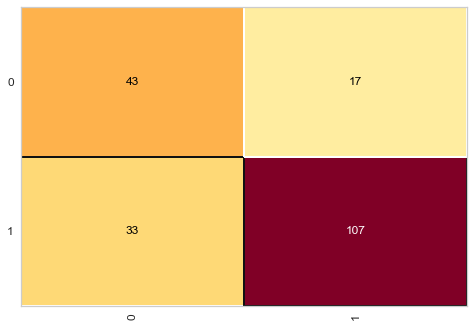

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

nv = GaussianNB()
nv.fit(X_train, y_train)
pred_nv = nv.predict(X_test)

from yellowbrick.classifier import ConfusionMatrix
v = ConfusionMatrix(GaussianNB())
v.fit(X_train, y_train)
v.score(X_test, y_test)

# another way to view the results
print(classification_report(y_test, pred_nv))
print("AUC", metrics.roc_auc_score(y_test, pred_nv))

### Model 3 - Logistic Regression

              precision    recall  f1-score   support

           0       0.54      0.73      0.62        60
           1       0.86      0.73      0.79       140

    accuracy                           0.73       200
   macro avg       0.70      0.73      0.71       200
weighted avg       0.77      0.73      0.74       200

AUC: 0.730952380952381


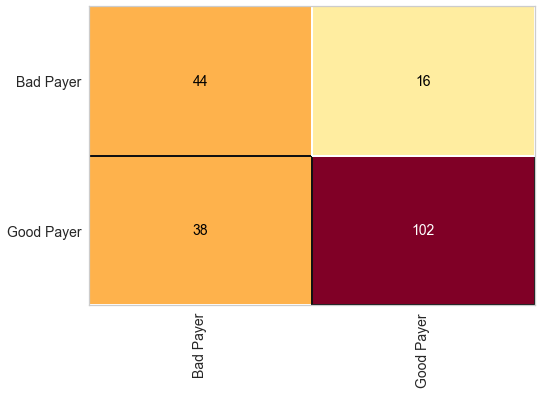

In [25]:
# apply Logistics regression
from sklearn.linear_model import LogisticRegression

clf_ros=  LogisticRegression(random_state=80).fit(X_train, y_train)

# predict the test data
pred_lr = clf_ros.predict(X_test)

# print the model performance metrics
cm = ConfusionMatrix(clf_ros, classes=['Bad Payer','Good Payer'],fontsize=14)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

print(classification_report(y_test, pred_lr))
print("AUC:", metrics.roc_auc_score(y_test, pred_lr))

### Model 4 - Gradient Boosting

#### Using kfold and cv

              precision    recall  f1-score   support

           0       0.55      0.63      0.59        60
           1       0.83      0.78      0.80       140

    accuracy                           0.73       200
   macro avg       0.69      0.71      0.70       200
weighted avg       0.75      0.73      0.74       200

AUC é de:  68.0


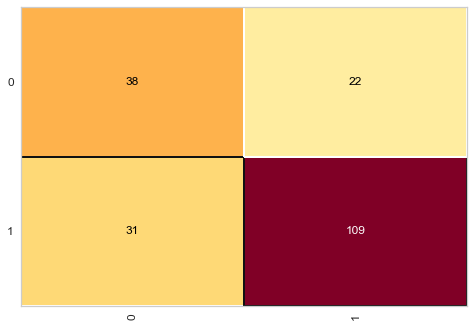

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

x = df1.shape[1] - 1
gb_X = df1.iloc[:, 0:x].values
gb_y = df1["credit_risk"].values

#Recursive feature elimination
from sklearn.feature_selection import RFE

prev_x = np.array(gb_X)
cla_y = np.array(gb_y)

gb = GradientBoostingClassifier(random_state=0)

rfe = RFE(gb, n_features_to_select=8, step=1)
fit = rfe.fit(prev_x, cla_y)

# model trainning
gb.fit(X_train, y_train)
previsoes = gb.predict(X_test)


from yellowbrick.classifier import ConfusionMatrix
v = ConfusionMatrix(gb)
v.score(X_test, y_test)


from sklearn.metrics import classification_report

print(classification_report(y_test, previsoes))


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

Kf = KFold(n_splits=5, shuffle=True, random_state=0)

auc = cross_val_score(gb, X_test, y_test, cv=Kf, scoring='accuracy')

#Area under the curve
print("AUC é de: ", auc.mean() * 100)

### Conclusion

In [41]:
#as we can see below, the best classification result é model 2 Naive Bayes! Because there is a higher accuracy and AUC.

print("Model 1:", classification_report(y_test, pred_svm2))
print("Model 1 -> AUC", metrics.roc_auc_score(y_test, pred_svm2),"\n")
print("________________________________________________________________")
print("Model 2:", classification_report(y_test, pred_nv))
print("Model 2 -> AUC", metrics.roc_auc_score(y_test, pred_nv),"\n")
print("________________________________________________________________")
print("Model 3:", classification_report(y_test, pred_lr))
print("Model 3 -> AUC", metrics.roc_auc_score(y_test, pred_lr),"\n")
print("________________________________________________________________")
print("Model 4:", classification_report(y_test, previsoes))
print("Model 4 -> AUC", metrics.roc_auc_score(y_test, previsoes))

Model 1:               precision    recall  f1-score   support

           0       0.53      0.77      0.63        60
           1       0.88      0.71      0.79       140

    accuracy                           0.73       200
   macro avg       0.71      0.74      0.71       200
weighted avg       0.77      0.73      0.74       200

Model 1 -> AUC 0.7404761904761905 

________________________________________________________________
Model 2:               precision    recall  f1-score   support

           0       0.57      0.72      0.63        60
           1       0.86      0.76      0.81       140

    accuracy                           0.75       200
   macro avg       0.71      0.74      0.72       200
weighted avg       0.77      0.75      0.76       200

Model 2 -> AUC 0.7404761904761904 

________________________________________________________________
Model 3:               precision    recall  f1-score   support

           0       0.54      0.73      0.62        60
        

### Happy Code!!!